In [17]:
import os,sys
from preprocess_data import get_TrainValTestLoader, get_TrainValTestDataset, get_TrainValTestData, property_label
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
args_data_dir = 'data'
prefix = ""
sequence_length = 400
batch_size = 600
shuffle = True
dataset = 'c20'
dataset_dir = os.path.join(args_data_dir, dataset+"/") # TODO
train_set, val_set, test_set = get_TrainValTestDataset(dataset_dir, k=0, prefix=prefix, seq_len=sequence_length)
train_loader, val_loader, test_loader = get_TrainValTestLoader(dataset_dir, k=0, batch_size=batch_size,shuffle=shuffle, prefix=prefix,seq_len=sequence_length)
X_train, X_val, X_test, Y_train, Y_val, Y_test = get_TrainValTestData(dataset_dir, k=0, prefix=prefix,seq_len=sequence_length)


chop org data of length 400 into 1 segments, each of which is has length 400
chop org data of length 400 into 1 segments, each of which is has length 400
chop org data of length 400 into 1 segments, each of which is has length 400


In [7]:
for i, (x,  y) in enumerate(train_loader):
    print(x.shape)

torch.Size([600, 19, 400])


<AxesSubplot:>

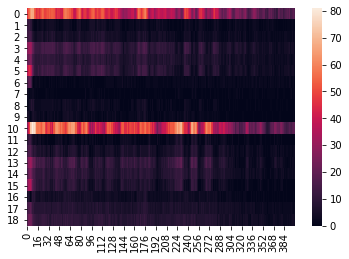

In [9]:
sns.heatmap(x[0,:, :])

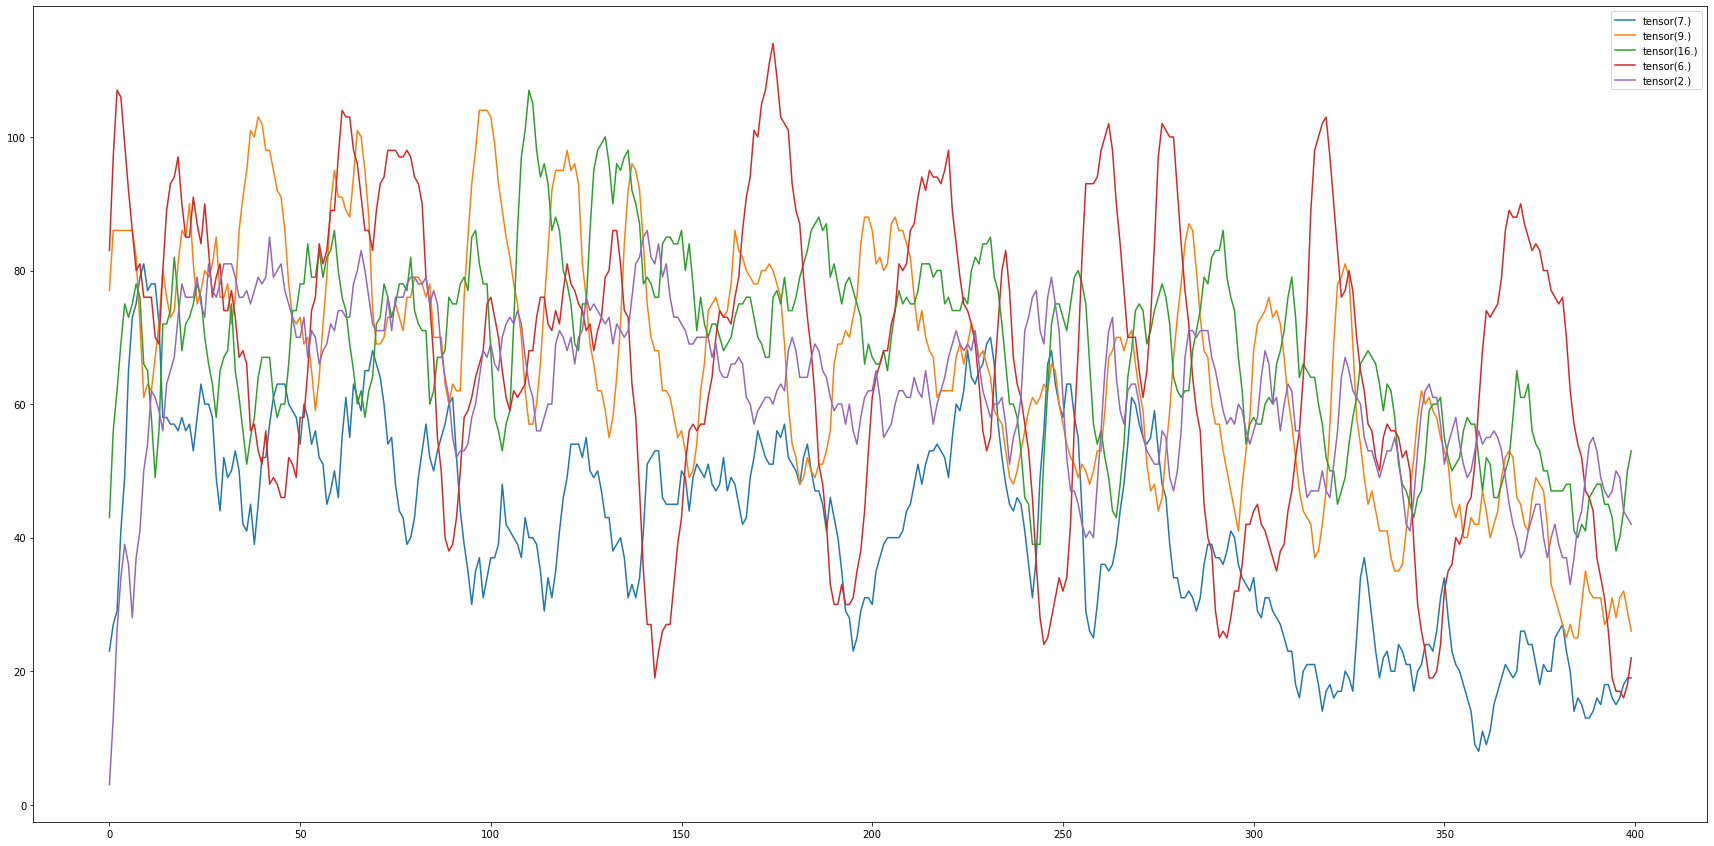

In [22]:
saved = [] # label
data = []
for i in range(600):
    if y[i] not in saved:
        saved.append(y[i])
        data.append(x[i,10,:])
    if len(saved) == 20:
        exit
plt.figure(figsize=(30,15))
for i in range(5):
    plt.plot(data[i], label=str(saved[i]))
plt.legend()

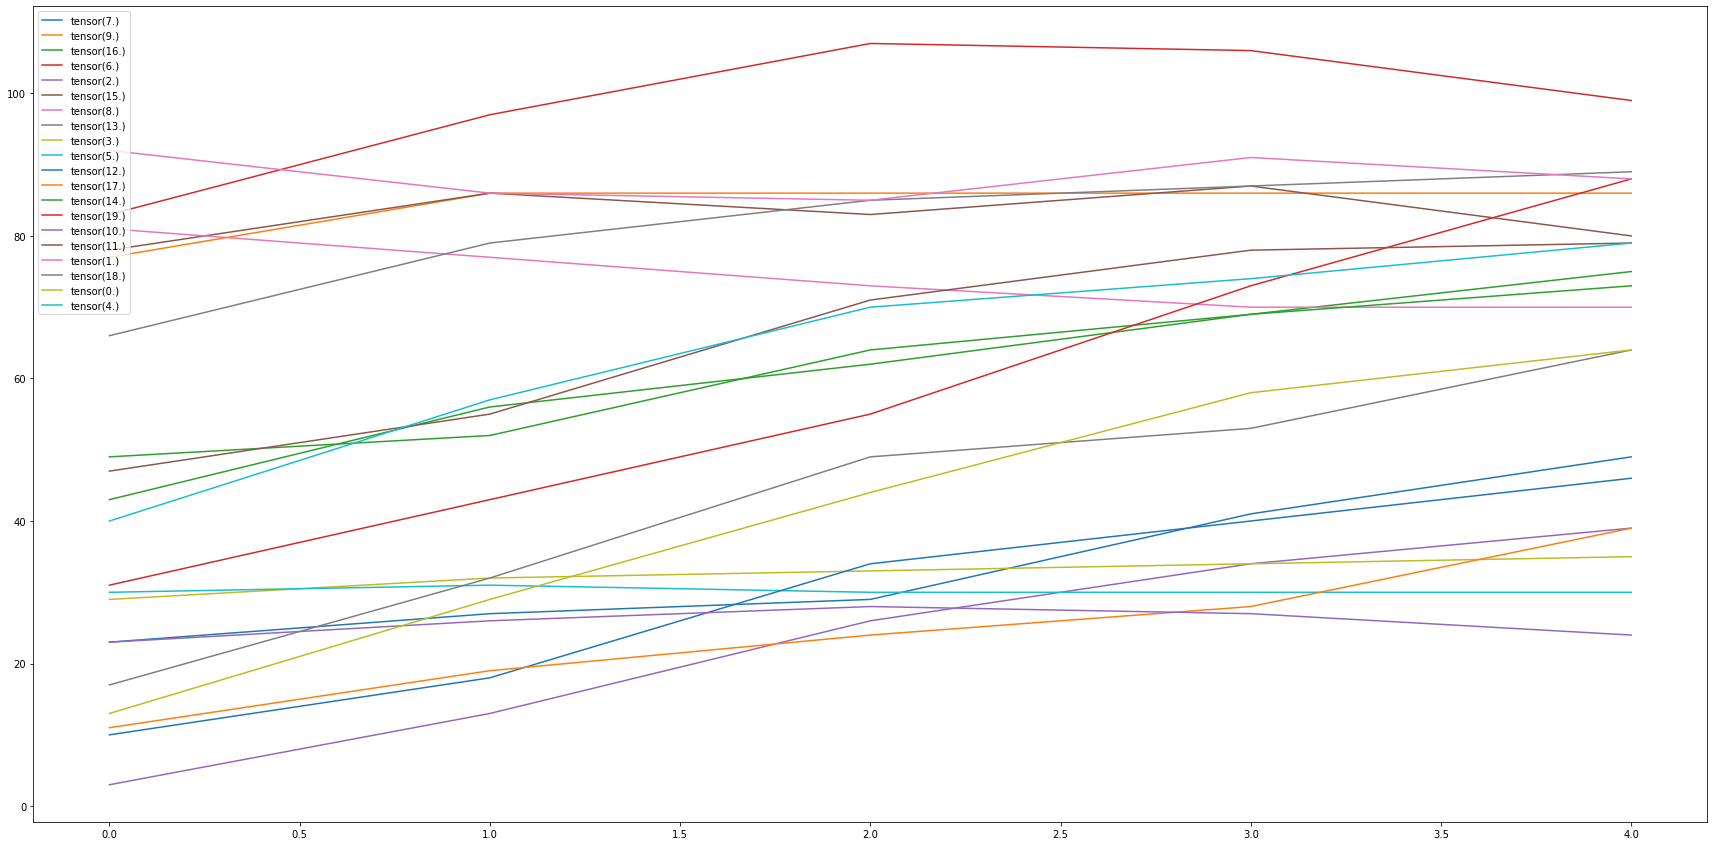

In [32]:
plt.figure(figsize=(30,15))
for i in range(20):
    plt.plot(data[i][:5], label=str(saved[i]))
plt.legend()

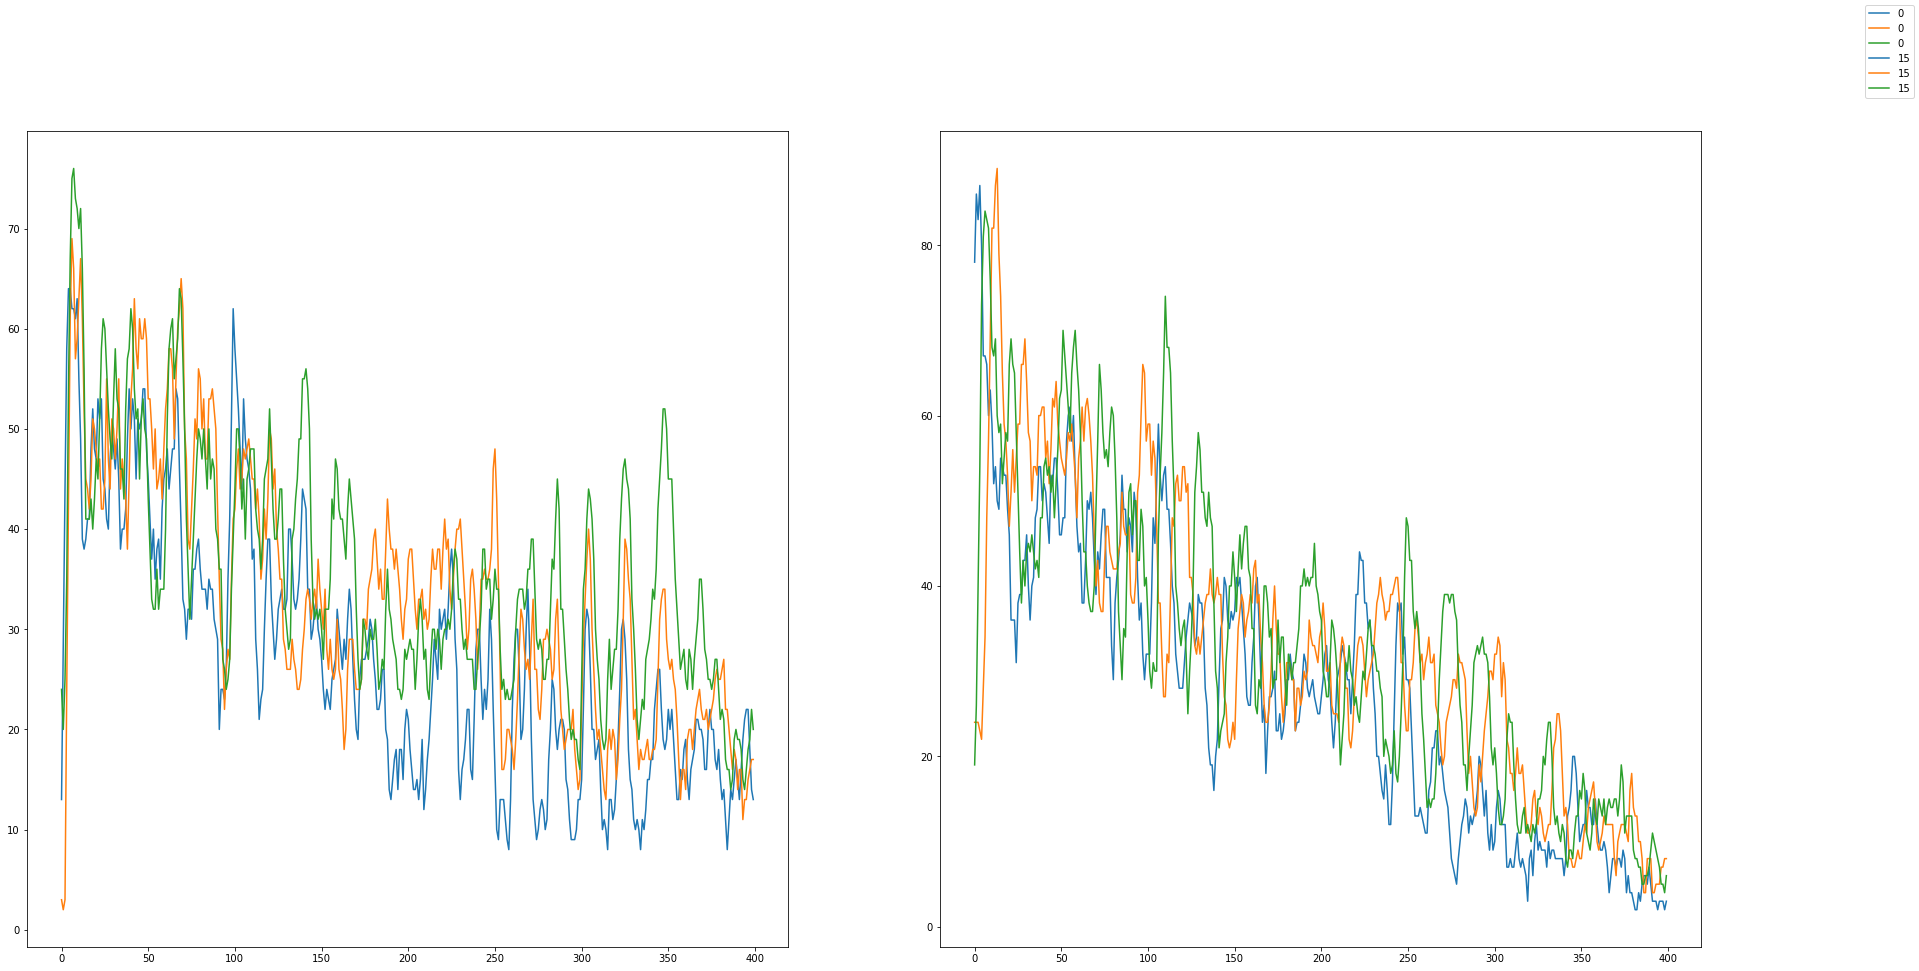

In [29]:
data_0 = []
data_15=[]
for i in range(600):
    if y[i] == 0:
        data_0.append(x[i,10,:])
    if y[i] == 15:
        data_15.append(x[i,10,:])
    if len(data_0) >= 20 and len(data_15) >= 20:
        exit
    
fig, ax = plt.subplots(1,2,figsize=(30,15))
for i in range(3):
    ax[0].plot(data_0[i], label='0')
    ax[1].plot(data_15[i], label='15')
fig.legend()

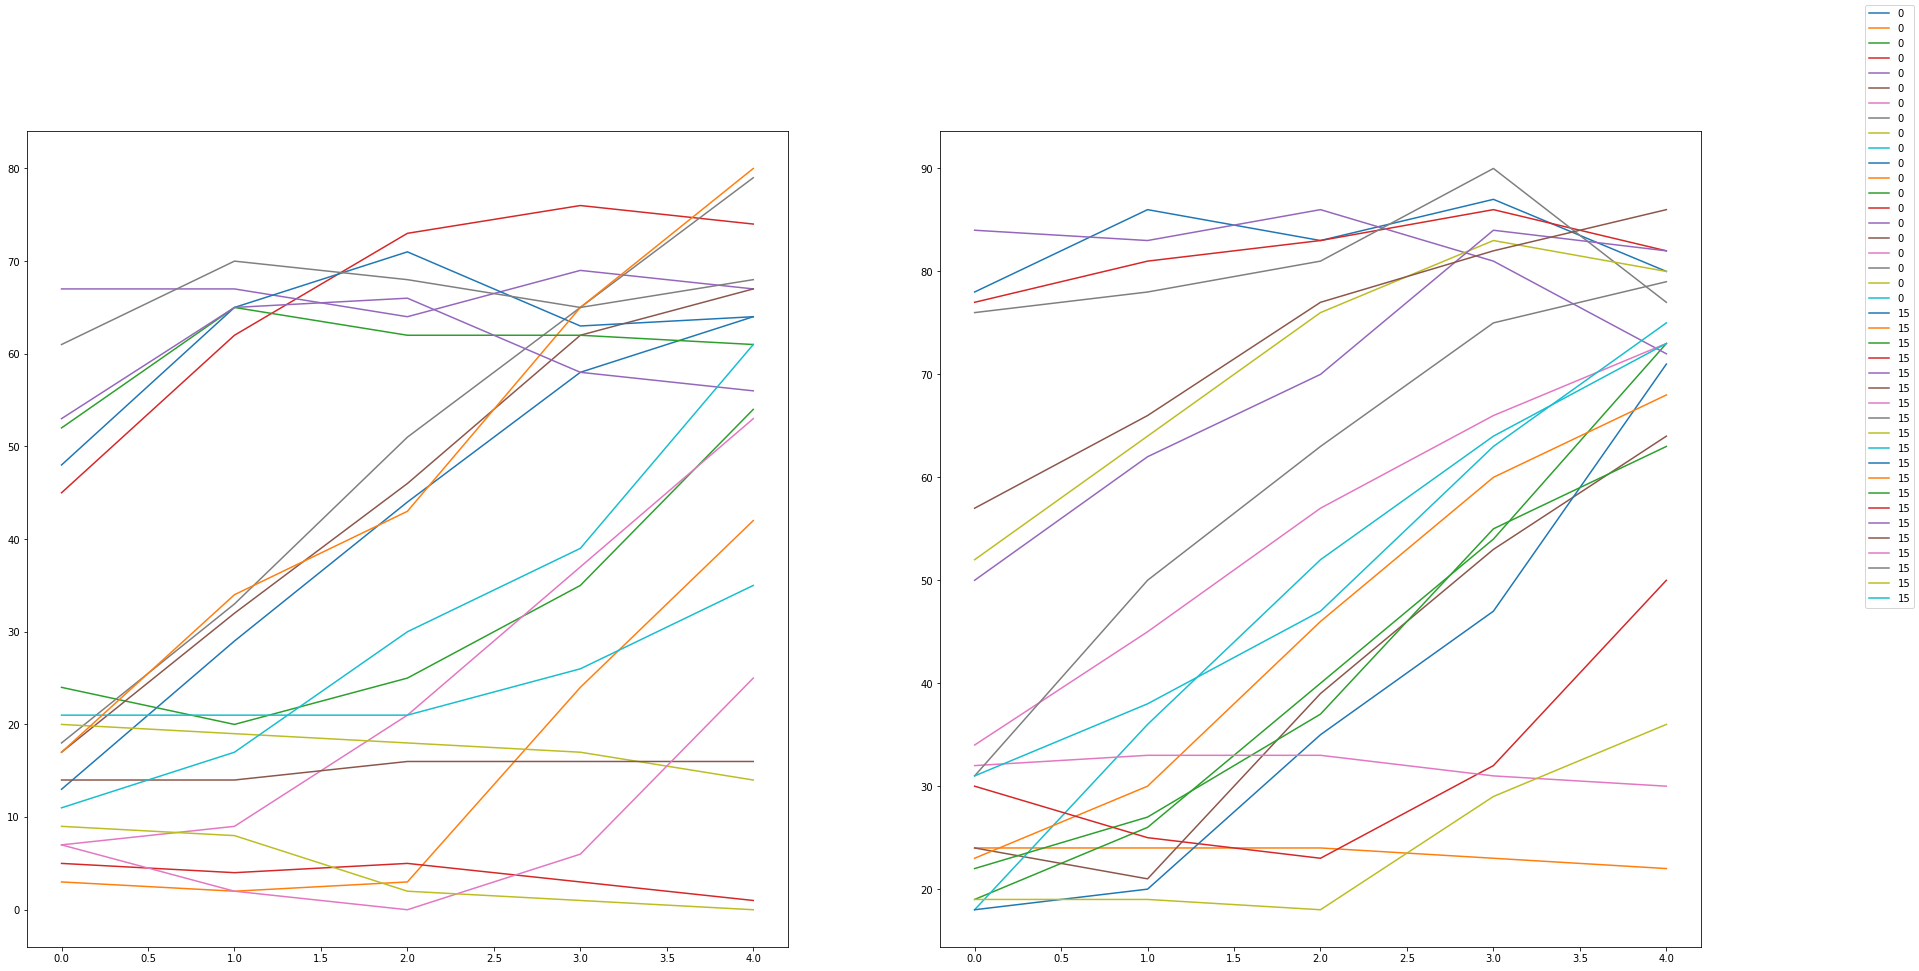

In [38]:
import numpy as np
fig, ax = plt.subplots(1,2,figsize=(30,15))
# for i in range(10):
for i in np.arange(0,20,1):
    ax[0].plot(data_0[i][:5], label='0')
    ax[1].plot(data_15[i][:5], label='15')
fig.legend()